In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')

# 불필요한 컬럼 제거 (인덱스 및 ID)
df = df.drop(columns=['Unnamed: 0', 'id'])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


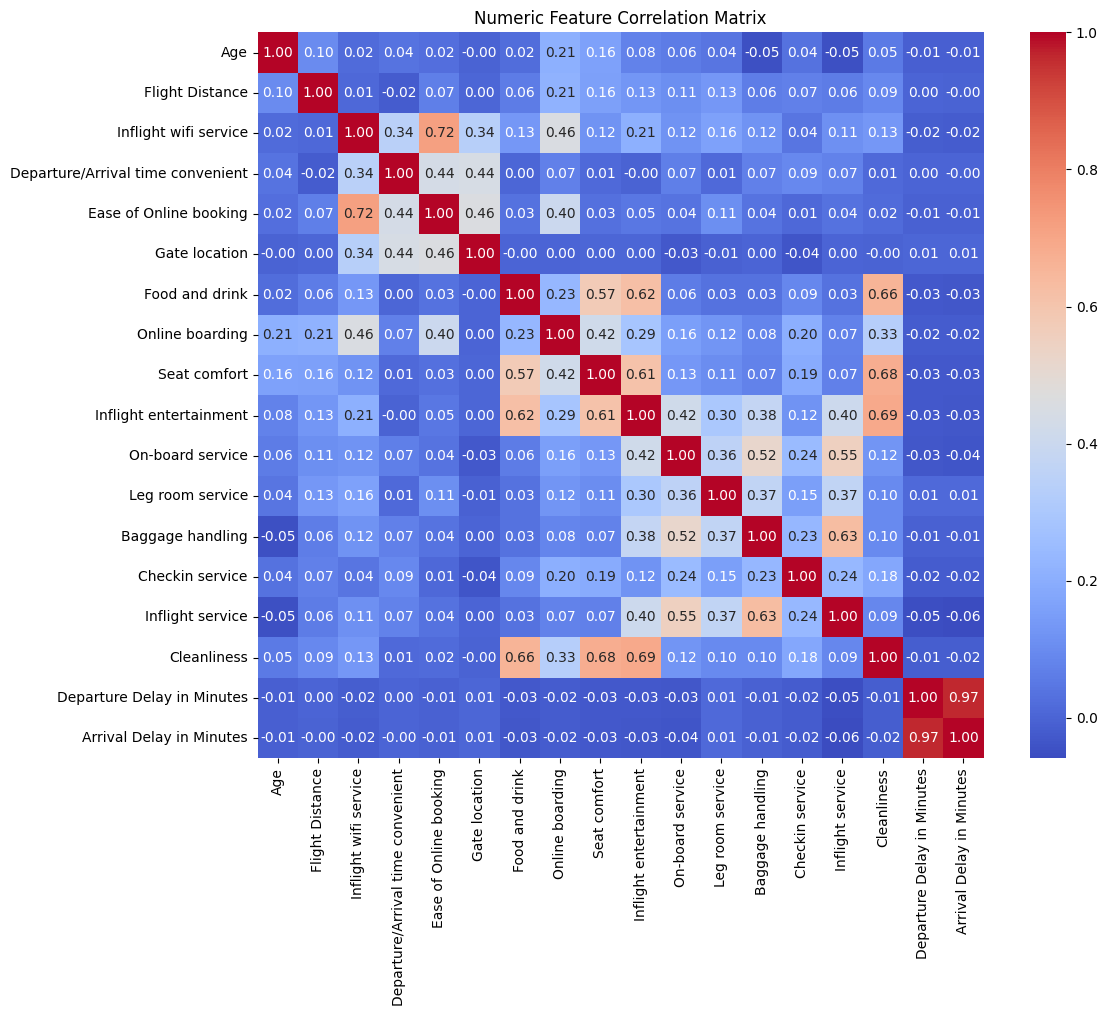

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 피처만 추출
numeric_df = df.select_dtypes(include=['number'])

# 상관관계 행렬 계산
correlation_matrix = numeric_df.corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Numeric Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [ ]:
# List of unnecessary features
drop_cols = [
    'Arrival Delay in Minutes',  # Duplicated with Departure Delay
    'Gate location',             # Very low correlation
    'Inflight service',          # Potential redundancy
    'Customer Type', 'Type of Travel' # Highly correlated with satisfaction
]


# 피처 제거
dflight = df.drop(columns=drop_cols)

# 결과 확인
print(f"원본 피처 수: {df.shape[1]}개")
print(f"제거 후 피처 수: {dflight.shape[1]}개")

원본 피처 수: 23개
제거 후 피처 수: 18개


In [ ]:
# 100마일 이하 데이터 제거
dflight = dflight[dflight['Flight Distance'] > 100]

# 결과 확인
print(f"💡 100마일 초과 데이터 수: {len(dflight)}")
dflight.head()

💡 100마일 초과 데이터 수: 103073


,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,13,Eco Plus,460,3,4,3,5,3,5,5,4,3,4,4,5,25,neutral or dissatisfied
1,Male,25,Business,235,3,2,3,1,3,1,1,1,5,3,1,1,1,neutral or dissatisfied
2,Female,26,Business,1142,2,2,2,5,5,5,5,4,3,4,4,5,0,satisfied
3,Female,25,Business,562,2,5,5,2,2,2,2,2,5,3,1,2,11,neutral or dissatisfied
4,Male,61,Business,214,3,3,3,4,5,5,3,3,4,4,3,3,0,satisfied


In [ ]:
# 900마일 기준으로 나누기
dflight_over500 = dflight[dflight['Flight Distance'] >= 500].copy()
dflight_under500 = dflight[dflight['Flight Distance'] < 500].copy()

# 결과 확인
print(f"✅ 500마일 이상 데이터 수: {len(dflight_over500)}")
print(f"✅ 500마일 미만 데이터 수: {len(dflight_under500)}")

✅ 500마일 이상 데이터 수: 71748
✅ 500마일 미만 데이터 수: 31325


# 500마일 이상

In [ ]:
# 🎯 타겟 인코딩
dflight_over500['satisfaction'] = dflight_over500['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# ✅ Binary 변수 인코딩
dflight_over500['Gender'] = dflight_over500['Gender'].map({'Male': 1, 'Female': 0})

# ✅ 나이 구간화 + One-Hot
bins = [0, 18, 30, 45, 60, 100]
labels = ['teen', 'young_adult', 'adult', 'mid_age', 'senior']
dflight_over500['AgeGroup'] = pd.cut(dflight_over500['Age'], bins=bins, labels=labels)
dflight_over500.drop(columns=['Age'], inplace=True)
dflight_over500 = pd.get_dummies(dflight_over500, columns=['AgeGroup'], drop_first=False)

# 먼저 Class 따로 인코딩
dflight_over500 = pd.get_dummies(dflight_over500, columns=['Class'], drop_first=False)

# 그 다음 만족도 척도 인코딩
# ordinal_cols = [
#     'Inflight wifi service', 'Departure/Arrival time convenient',
#     'Ease of Online booking', 'Food and drink', 'Online boarding',
#     'Seat comfort', 'Inflight entertainment', 'On-board service',
#     'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness'
# ]
# dflight_over500 = pd.get_dummies(dflight_over500, columns=ordinal_cols, drop_first=False)

# ✅ 확인
print(f"✅ dflight_over500 컬럼 수: {dflight_over500.shape[1]}")

✅ dflight_over500 컬럼 수: 24


In [ ]:
dflight_over500.head()

,Gender,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Departure Delay in Minutes,satisfaction,AgeGroup_teen,AgeGroup_young_adult,AgeGroup_adult,AgeGroup_mid_age,AgeGroup_senior,Class_Business,Class_Eco,Class_Eco Plus
2,0,1142,2,2,2,5,5,5,5,4,...,0,1,False,True,False,False,False,True,False,False
3,0,562,2,5,5,2,2,2,2,2,...,11,0,False,True,False,False,False,True,False,False
5,0,1180,3,4,2,1,2,1,1,3,...,0,0,False,True,False,False,False,False,True,False
6,1,1276,2,4,2,2,2,2,2,3,...,9,0,False,False,False,True,False,False,True,False
7,0,2035,4,3,4,5,5,5,5,5,...,4,1,False,False,False,True,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# 🎯 타겟과 피처 분리
X_over = dflight_over500.drop('satisfaction', axis=1)
y_over = dflight_over500['satisfaction']

# ✅ 학습/테스트 분리
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(
    X_over, y_over,
    test_size=0.2,
    random_state=42,
    stratify=y_over
)

# ✅ 확인
print(f"X_over_train shape: {X_over_train.shape}")
print(f"X_over_test shape: {X_over_test.shape}")
print(f"y_over_train 분포:\n{y_over_train.value_counts(normalize=True)}")
print(f"y_over_test 분포:\n{y_over_test.value_counts(normalize=True)}")

X_over_train shape: (57398, 23)
X_over_test shape: (14350, 23)
y_over_train 분포:
satisfaction
0    0.521743
1    0.478257
Name: proportion, dtype: float64
y_over_test 분포:
satisfaction
0    0.521742
1    0.478258
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. 모델 선언 및 학습
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_over_train, y_over_train)

# 2. 예측
y_over_pred = logreg.predict(X_over_test)
y_over_proba = logreg.predict_proba(X_over_test)[:, 1]

# 3. 평가 지표 출력
print("📋 Classification Report (500mile up):")
print(classification_report(y_over_test, y_over_pred))

print("🔢 Confusion Matrix:")
print(confusion_matrix(y_over_test, y_over_pred))

📋 Classification Report (500mile up):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7487
           1       0.86      0.84      0.85      6863

    accuracy                           0.86     14350
   macro avg       0.86      0.86      0.86     14350
weighted avg       0.86      0.86      0.86     14350

🔢 Confusion Matrix:
[[6538  949]
 [1118 5745]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


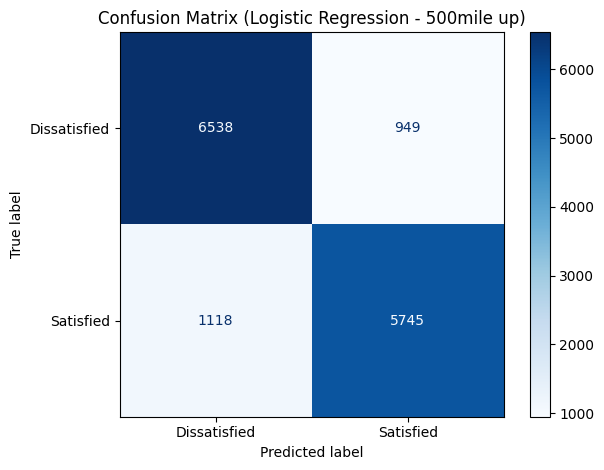

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 혼동행렬 시각화
disp = ConfusionMatrixDisplay.from_predictions(
    y_over_test, y_over_pred,
    display_labels=["Dissatisfied", "Satisfied"],  # 클래스 라벨
    cmap=plt.cm.Blues,
    colorbar=True
)

plt.title("Confusion Matrix (Logistic Regression - 500mile up)")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 모델 선언 및 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_over_train, y_over_train)

# 2. 예측
y_over_pred_rf = rf_clf.predict(X_over_test)

# 3. 평가 지표 출력
print("📋 [Random Forest] Classification Report (500mile up):")
print(classification_report(y_over_test, y_over_pred_rf))

print("🔢 Confusion Matrix:")
print(confusion_matrix(y_over_test, y_over_pred_rf))

📋 [Random Forest] Classification Report (500mile up):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7487
           1       0.96      0.93      0.95      6863

    accuracy                           0.95     14350
   macro avg       0.95      0.95      0.95     14350
weighted avg       0.95      0.95      0.95     14350

🔢 Confusion Matrix:
[[7242  245]
 [ 449 6414]]


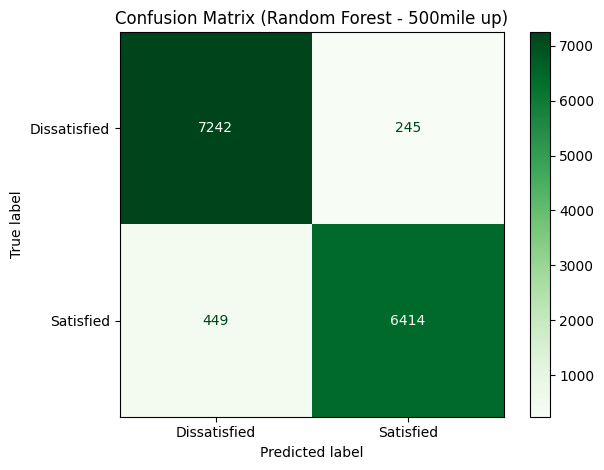

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 혼동행렬 시각화
disp = ConfusionMatrixDisplay.from_predictions(
    y_over_test, y_over_pred_rf,
    display_labels=["Dissatisfied", "Satisfied"],
    cmap=plt.cm.Greens,
    colorbar=True
)

plt.title("Confusion Matrix (Random Forest - 500mile up)")
plt.grid(False)
plt.tight_layout()
plt.show()

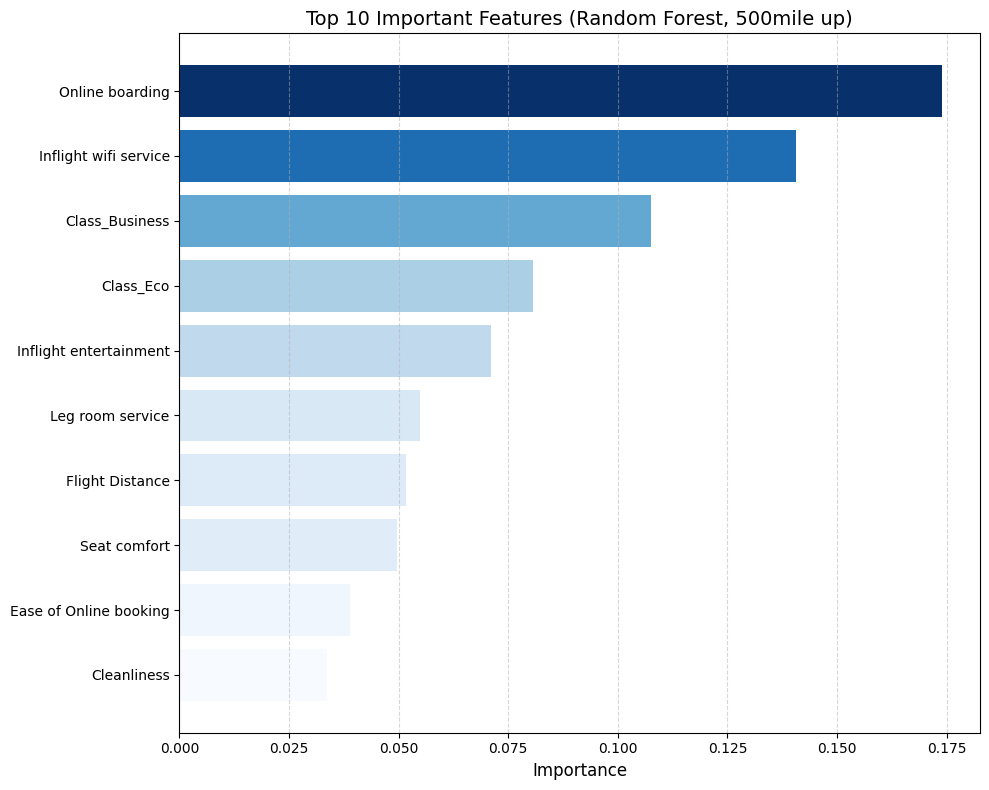

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 1. 변수 중요도 추출
importances = rf_clf.feature_importances_
feature_names = X_over_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 2. 상위 n개 추출
top_n = 10
top_features = feature_importance_df.head(top_n).iloc[::-1]  # 중요도 큰 순 → 위부터 출력

# 3. 컬러 그라데이션 (Blues 컬러맵 사용)
norm = mcolors.Normalize(vmin=min(top_features['Importance']), vmax=max(top_features['Importance']))
cmap = cm.Blues
colors = [cmap(norm(val)) for val in top_features['Importance']]

# 4. 시각화
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color=colors)

plt.xlabel('Importance', fontsize=12)
plt.title(f'Top {top_n} Important Features (Random Forest, 500mile up)', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 500마일 이하

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')

# 불필요한 컬럼 제거 (인덱스 및 ID)
df = df.drop(columns=['Unnamed: 0', 'id'])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# 불필요한 피처 리스트
drop_cols = [
    'Arrival Delay in Minutes',  # Departure Delay와 중복
    'Gate location',      # 상관관계 거의 없음
    'Inflight service'    # 중복 가능성 있음
    ,'Customer Type', 'Type of Travel'
]

# 피처 제거
dflight = df.drop(columns=drop_cols)

# 결과 확인
print(f"원본 피처 수: {df.shape[1]}개")
print(f"제거 후 피처 수: {dflight.shape[1]}개")

원본 피처 수: 23개
제거 후 피처 수: 18개


In [ ]:
# 100마일 이하 데이터 제거
dflight = dflight[dflight['Flight Distance'] > 100]

# 결과 확인
print(f"💡 100마일 초과 데이터 수: {len(dflight)}")
dflight.head()

💡 100마일 초과 데이터 수: 103073


,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,13,Eco Plus,460,3,4,3,5,3,5,5,4,3,4,4,5,25,neutral or dissatisfied
1,Male,25,Business,235,3,2,3,1,3,1,1,1,5,3,1,1,1,neutral or dissatisfied
2,Female,26,Business,1142,2,2,2,5,5,5,5,4,3,4,4,5,0,satisfied
3,Female,25,Business,562,2,5,5,2,2,2,2,2,5,3,1,2,11,neutral or dissatisfied
4,Male,61,Business,214,3,3,3,4,5,5,3,3,4,4,3,3,0,satisfied


In [ ]:
# 900마일 기준으로 나누기
dflight_over500 = dflight[dflight['Flight Distance'] >= 500].copy()
dflight_under500 = dflight[dflight['Flight Distance'] < 500].copy()

# 결과 확인
print(f"✅ 500마일 이상 데이터 수: {len(dflight_over500)}")
print(f"✅ 500마일 미만 데이터 수: {len(dflight_under500)}")

✅ 500마일 이상 데이터 수: 71748
✅ 500마일 미만 데이터 수: 31325


In [ ]:
# 🎯 타겟 인코딩
dflight_under500['satisfaction'] = dflight_under500['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# ✅ Binary 변수 인코딩
dflight_under500['Gender'] = dflight_under500['Gender'].map({'Male': 1, 'Female': 0})

# ✅ 나이 구간화 + One-Hot 인코딩
bins = [0, 18, 30, 45, 60, 100]
labels = ['teen', 'young_adult', 'adult', 'mid_age', 'senior']
dflight_under500['AgeGroup'] = pd.cut(dflight_under500['Age'], bins=bins, labels=labels)
dflight_under500.drop(columns=['Age'], inplace=True)
dflight_under500 = pd.get_dummies(dflight_under500, columns=['AgeGroup'], drop_first=False)

# ✅ Class 인코딩
dflight_under500 = pd.get_dummies(dflight_under500, columns=['Class'], drop_first=False)

# # ✅ 1~5점 만족도 척도 피처 → One-Hot 인코딩
# ordinal_cols2 = [
#     'Inflight wifi service', 'Departure/Arrival time convenient',
#     'Ease of Online booking', 'Food and drink', 'Online boarding',
#     'Seat comfort', 'Inflight entertainment', 'On-board service',
#     'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness'
# ]

#dflight_under500 = pd.get_dummies(dflight_under500, columns=ordinal_cols2, drop_first=False)

# ✅ 확인
print(f"✅ dflight_under500 컬럼 수: {dflight_under500.shape[1]}")

✅ dflight_under500 컬럼 수: 24


In [ ]:
import pandas as pd

# 컬럼 집합 만들기
cols_over = set(dflight_over500.columns)
cols_under = set(dflight_under500.columns)

# 공통 / 차집합
only_in_over = sorted(cols_over - cols_under)
only_in_under = sorted(cols_under - cols_over)
common_cols = sorted(cols_over & cols_under)

# 비교 결과 보기 좋게 출력
diff_df = pd.DataFrame({
    'Only in dflight_over500': pd.Series(only_in_over),
    'Only in dflight_under500': pd.Series(only_in_under)
})

# 결과 출력
print(f"공통된 컬럼 수: {len(common_cols)}개")
print(f"over500에만 있는 컬럼 수: {len(only_in_over)}개")
print(f"under500에만 있는 컬럼 수: {len(only_in_under)}개")

# 테이블 확인
display(diff_df)


공통된 컬럼 수: 16개
over500에만 있는 컬럼 수: 2개
under500에만 있는 컬럼 수: 8개


,Only in dflight_over500,Only in dflight_under500
0,Age,AgeGroup_adult
1,Class,AgeGroup_mid_age
2,NaN,AgeGroup_senior
3,NaN,AgeGroup_teen
4,NaN,AgeGroup_young_adult
5,NaN,Class_Business
6,NaN,Class_Eco
7,NaN,Class_Eco Plus


In [ ]:
from sklearn.model_selection import train_test_split

# 🎯 타겟과 피처 분리
X_under = dflight_under500.drop('satisfaction', axis=1)
y_under = dflight_under500['satisfaction']

# ✅ 학습/테스트 분리
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(
    X_under, y_under,
    test_size=0.2,
    random_state=42,
    stratify=y_under
)

# ✅ 확인
print(f"X_under_train shape: {X_under_train.shape}")
print(f"X_under_test shape: {X_under_test.shape}")
print(f"y_under_train 분포:\n{y_under_train.value_counts(normalize=True)}")
print(f"y_under_test 분포:\n{y_under_test.value_counts(normalize=True)}")

X_under_train shape: (25060, 23)
X_under_test shape: (6265, 23)
y_under_train 분포:
satisfaction
0    0.667159
1    0.332841
Name: proportion, dtype: float64
y_under_test 분포:
satisfaction
0    0.667199
1    0.332801
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. 모델 선언 및 학습
logreg_under = LogisticRegression(max_iter=1000, random_state=42)
logreg_under.fit(X_under_train, y_under_train)

# 2. 예측
y_under_pred = logreg_under.predict(X_under_test)
y_under_proba = logreg_under.predict_proba(X_under_test)[:, 1]

# 3. 평가 지표 출력
print("📋 Classification Report (500mile down):")
print(classification_report(y_under_test, y_under_pred))

print("🔢 Confusion Matrix:")
print(confusion_matrix(y_under_test, y_under_pred))


📋 Classification Report (500mile down):
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4180
           1       0.80      0.70      0.75      2085

    accuracy                           0.84      6265
   macro avg       0.83      0.81      0.82      6265
weighted avg       0.84      0.84      0.84      6265

🔢 Confusion Matrix:
[[3816  364]
 [ 622 1463]]


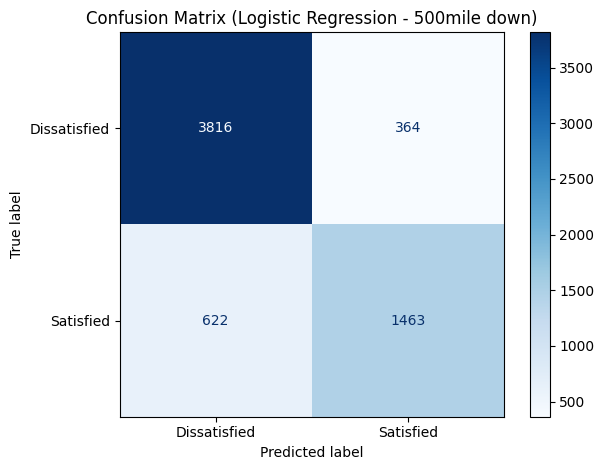

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 로지스틱 회귀 혼동행렬
ConfusionMatrixDisplay.from_predictions(
    y_under_test, y_under_pred,
    display_labels=["Dissatisfied", "Satisfied"],
    cmap=plt.cm.Blues,
    colorbar=True
)

plt.title("Confusion Matrix (Logistic Regression - 500mile down)")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. 모델 선언 및 학습
rf_under = RandomForestClassifier(n_estimators=100, random_state=42)
rf_under.fit(X_under_train, y_under_train)

# 2. 예측
y_under_pred_rf = rf_under.predict(X_under_test)

# 3. 평가 지표 출력
print("📋 [Random Forest] Classification Report (500mile down):")
print(classification_report(y_under_test, y_under_pred_rf))

print("🔢 Confusion Matrix:")
print(confusion_matrix(y_under_test, y_under_pred_rf))


📋 [Random Forest] Classification Report (500mile down):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4180
           1       0.93      0.88      0.90      2085

    accuracy                           0.94      6265
   macro avg       0.94      0.92      0.93      6265
weighted avg       0.94      0.94      0.94      6265

🔢 Confusion Matrix:
[[4034  146]
 [ 242 1843]]


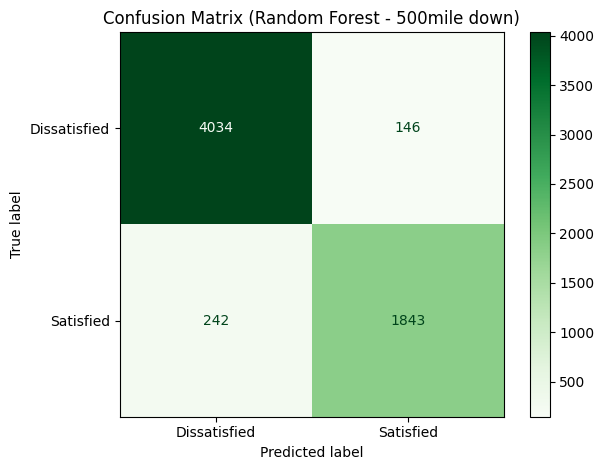

In [ ]:
# 랜덤 포레스트 혼동행렬
ConfusionMatrixDisplay.from_predictions(
    y_under_test, y_under_pred_rf,
    display_labels=["Dissatisfied", "Satisfied"],
    cmap=plt.cm.Greens,
    colorbar=True
)

plt.title("Confusion Matrix (Random Forest - 500mile down)")
plt.grid(False)
plt.tight_layout()
plt.show()

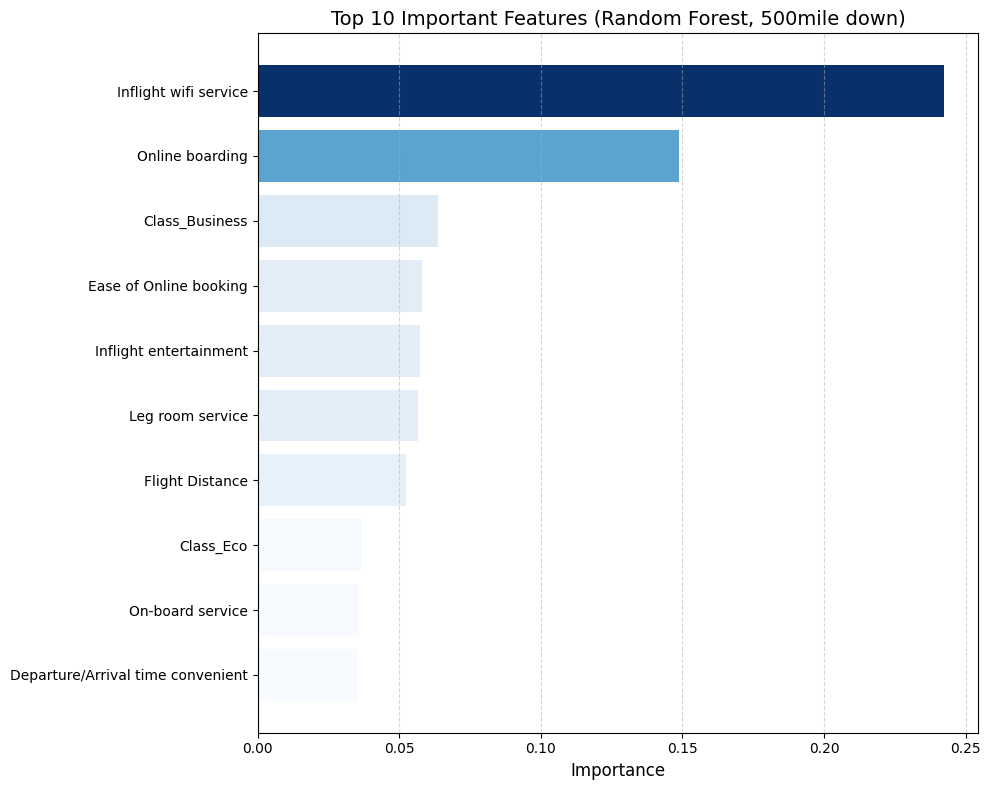

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 1. 변수 중요도 추출
importances_under = rf_under.feature_importances_
feature_names_under = X_under_train.columns
feature_importance_under = pd.DataFrame({
    'Feature': feature_names_under,
    'Importance': importances_under
}).sort_values(by='Importance', ascending=False)

# 2. 상위 n개만 추출
top_n = 10
top_features = feature_importance_under.head(top_n).iloc[::-1]  # 역순 정렬 (위에서부터 큰 순서로 그리기)

# 3. Normalize importance → 색상 맵핑용
norm = mcolors.Normalize(vmin=min(top_features['Importance']), vmax=max(top_features['Importance']))
cmap = cm.Blues  # 🔵 파란 계열 컬러맵

colors = [cmap(norm(val)) for val in top_features['Importance']]

# 4. 시각화
plt.figure(figsize=(10, 8))
bars = plt.barh(top_features['Feature'], top_features['Importance'], color=colors)

plt.xlabel('Importance', fontsize=12)
plt.title(f'Top {top_n} Important Features (Random Forest, 500mile down)', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()